In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [3]:
file_path = Path('salaries_clean.csv')

In [5]:
df = pd.read_csv(file_path)
df

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,1650,3289,sparkfun electronics,"boulder, co",CO,US,40.02,-105.25,junior software developer,Software,Junior,1.0,0.5,60500.0,0.0,800.0,0,NaN,3/23/16 8:24
1651,1651,3290,intel,europe,NaN,NaN,NaN,NaN,staff software enginer,Software,NaN,6.0,4.0,164000.0,0.0,20000.0,30000 USD,NaN,3/23/16 8:27
1652,1652,3293,$2bn valuation tech company,nyc,NaN,NaN,NaN,NaN,sr. frontend eng,Web,Senior,7.0,1.0,150000.0,0.0,0.0,0,NaN,3/23/16 8:41
1653,1653,3294,of maryland,"college park, md",MD,US,38.99,-76.93,scientific programmer (faculty research assist...,Applied Science,NaN,5.0,1.0,75000.0,NaN,NaN,NaN,NaN,3/23/16 8:43


In [7]:
df.describe()

,index,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655.000000,1655.000000,792.000000,792.000000,1608.000000,1608.000000,1.651000e+03,1.332000e+03,1.336000e+03
mean,827.000000,1684.100906,37.754394,-64.712273,6.756113,2.656163,6.325004e+06,2.240563e+04,1.177552e+04
std,477.901664,932.901390,16.740905,67.090364,5.687004,3.301834,2.461353e+08,3.097990e+05,6.921569e+04
min,0.000000,1.000000,-41.000000,-123.270000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,413.500000,897.000000,37.410000,-102.702500,3.000000,1.000000,6.100000e+04,0.000000e+00,0.000000e+00
50%,827.000000,1711.000000,38.580000,-95.000000,5.000000,2.000000,9.948000e+04,0.000000e+00,5.000000e+02
75%,1240.500000,2477.000000,45.440000,-64.562500,10.000000,3.000000,1.300000e+05,5.000000e+03,1.000000e+04
max,1654.000000,3298.000000,65.000000,174.000000,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1655 non-null   int64  
 1   salary_id                  1655 non-null   int64  
 2   employer_name              1651 non-null   object 
 3   location_name              1655 non-null   object 
 4   location_state             558 non-null    object 
 5   location_country           792 non-null    object 
 6   location_latitude          792 non-null    float64
 7   location_longitude         792 non-null    float64
 8   job_title                  1655 non-null   object 
 9   job_title_category         1655 non-null   object 
 10  job_title_rank             425 non-null    object 
 11  total_experience_years     1608 non-null   float64
 12  employer_experience_years  1608 non-null   float64
 13  annual_base_pay            1651 non-null   float

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
employer_name: ['opower' 'walmart' 'vertical knowledge' ... 'sparkfun electronics'
 '$2bn valuation tech company' 'of maryland']
location_name: ['san francisco, ca' 'bentonville, ar' 'cleveland, oh' 'waltham'
 'cupertino' 'eastern oregon' 'madison, wi' 'new york city' 'nyc'
 'san francisco' 'denver, co' 'chicago' 'west lafayette, in' 'minneapolis'
 'bordeaux' 'seattle' 'charleston, sc' 'bala cynwyd, pa' 'toronto, canada'
 'durham, nc' 'new york' 'santa clara' 'boulder co' 'bucharest, romania'
 'stockholm, sweden' 'sterling, va' 'orlando, florida' 'detroit, mi'
 'hillsboro, oregon' 'austin, tx' 'washington dc'
 'wellington, new zealand' 'albany, ny' 'ct' 'joplin mo' 'jersey city, nj'
 'phils' 'bristol, uk' 'philadelphia, pa' 'san jose, ca' 'cambridge, ma'
 'barcelona, spain' 'redmond, wa' 'ithaca, ny' 'amsterdam'
 'oklahoma city, ok' 'raleigh, nc' 'verona, wisconsin' 'karlstad, sweden'
 'nj' 'lubbock, tx' 'new york, ny' 'london, uk' 'sunnyvale' 'po

In [11]:
missing_values = df.isnull().sum()
missing_values

index                           0
salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
submitted_at                    0
dtype: int64

In [13]:
missing_columns = missing_values[missing_values > 0]
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns)

Columns with missing values:
employer_name                   4
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
dtype: int64


Text(0.5, 1.0, 'Heatmap of Missing Values')

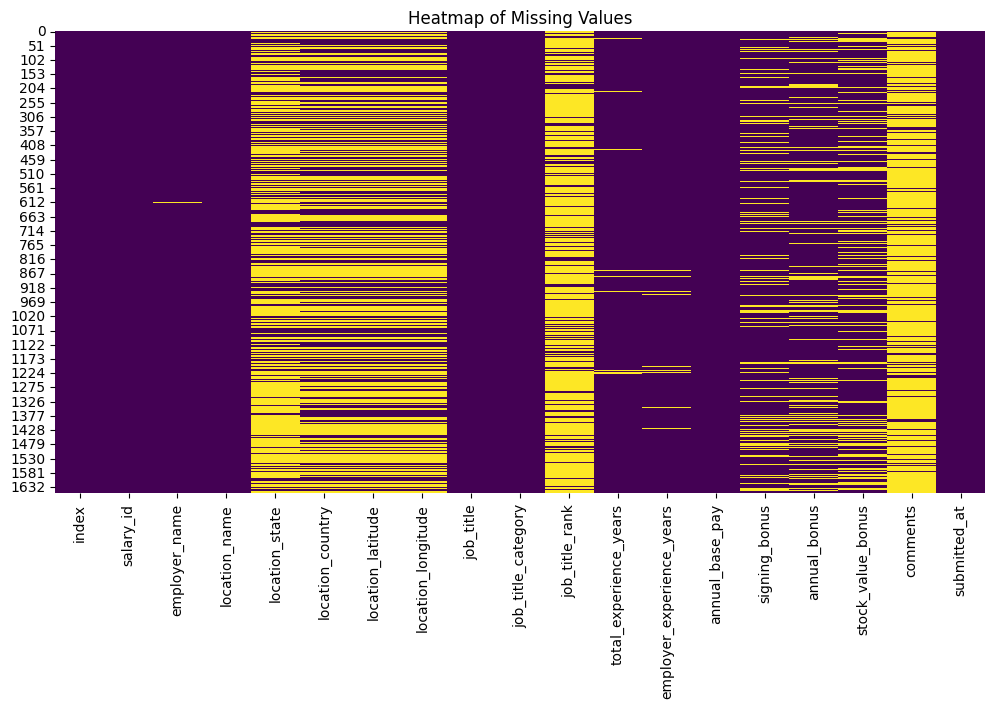

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")

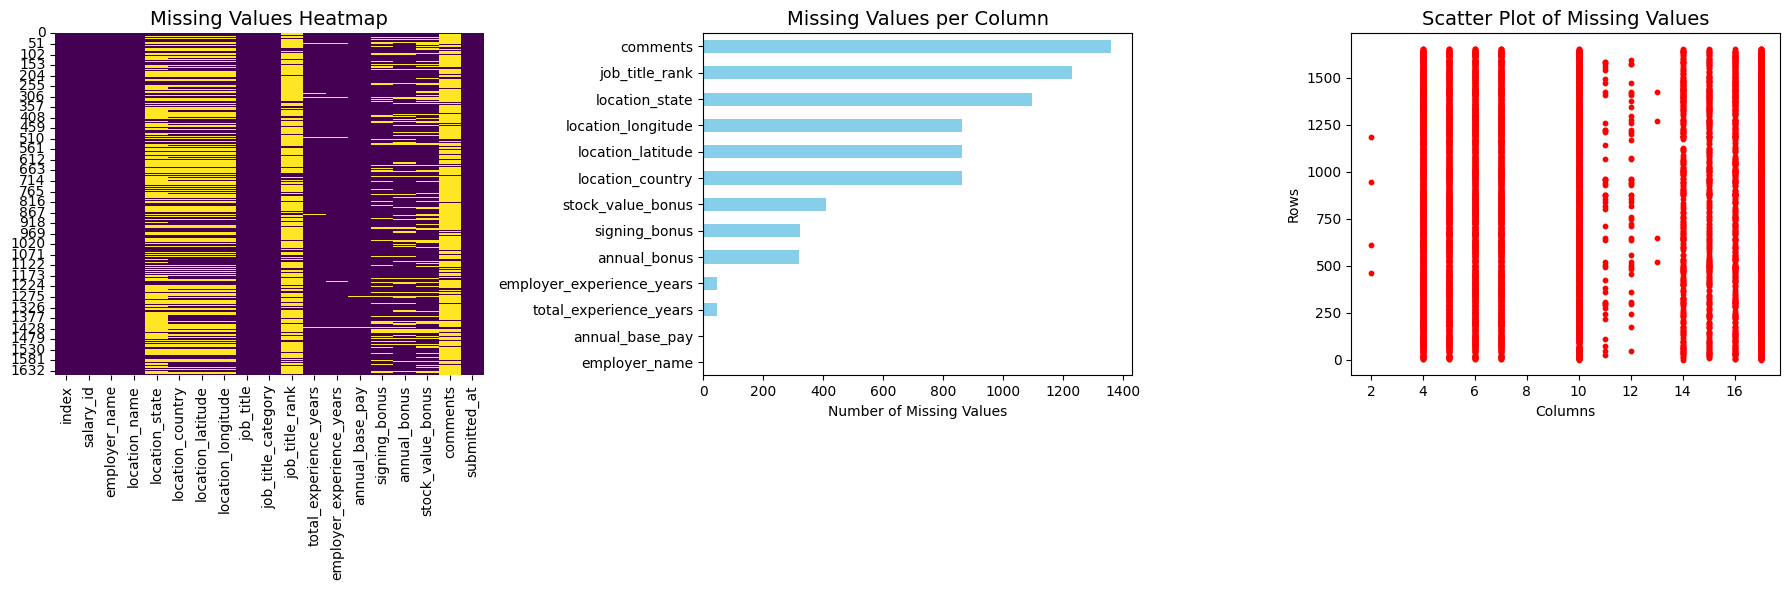

In [17]:
# Create the subplots for the heatmap, bar chart, and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# 1. Heatmap of missing values
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)

# 2. Bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only columns with missing values

# Check if there are any missing values before plotting the bar chart
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)

# 3. Scatter plot of missing values (showing rows and columns with missing data)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')

# Show the plot
plt.tight_layout()  # Adjusts layout for better spacing
plt.show()

In [7]:
import pandas as pd

# Handling missing values in categorical columns
categorical_columns = ['employer_name', 'location_state', 'location_country', 'job_title_rank', 'stock_value_bonus', 'comments']

# Impute missing categorical values with the most frequent category (mode)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Alternatively, you could drop rows with missing values in critical columns (e.g., location_name, job_title)
df.dropna(subset=['location_name', 'job_title'], inplace=True)

# Handling missing values in numeric columns
numeric_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Impute missing numeric values with the median (or mean, depending on the distribution)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop rows where 'stock_value_bonus' or 'comments' are missing, since they are less important for clustering
df.dropna(subset=['stock_value_bonus', 'comments'], inplace=True)

# Impute missing location_latitude and location_longitude with the median

# Check if there are still any missing values
missing_values = df.isnull().sum()
print(missing_values)

index                        0
salary_id                    0
employer_name                0
location_name                0
location_state               0
location_country             0
location_latitude            0
location_longitude           0
job_title                    0
job_title_category           0
job_title_rank               0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
stock_value_bonus            0
comments                     0
submitted_at                 0
dtype: int64


In [9]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [19]:
print(df.dtypes)

index                          int64
salary_id                      int64
employer_name                 object
location_name                 object
location_state                object
location_country              object
location_latitude            float64
location_longitude           float64
job_title                     object
job_title_category            object
job_title_rank                object
total_experience_years       float64
employer_experience_years    float64
annual_base_pay              float64
signing_bonus                float64
annual_bonus                 float64
stock_value_bonus             object
comments                      object
submitted_at                  object
dtype: object


In [11]:
df.drop(columns=['salary_id', 'index', 'comments', 'submitted_at'], inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 
                     'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Standardize the numerical data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [15]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['employer_name', 'location_name', 'job_title', 'location_state', 'location_country', 'job_title_category', 'job_title_rank'])

Text(0.5, 1.0, 'Boxplots to Detect Outliers')

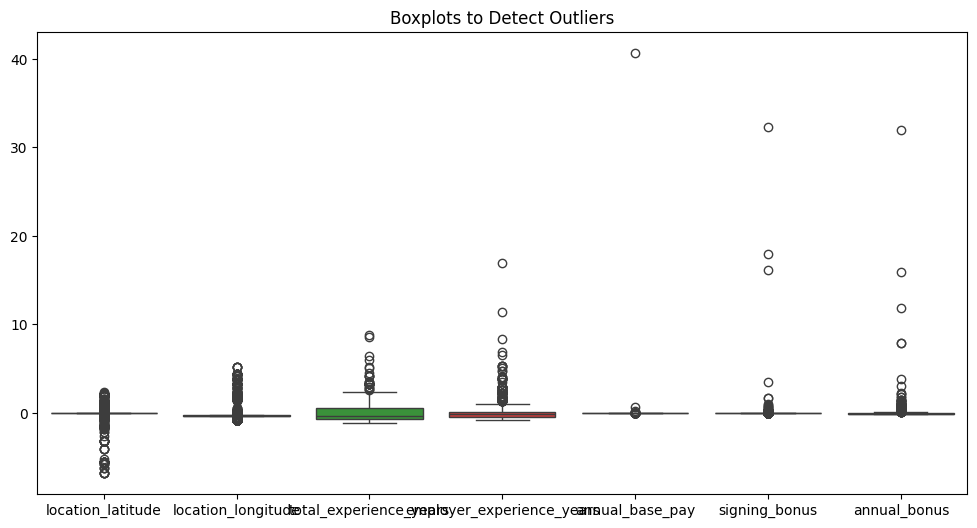

In [17]:
# checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplots to Detect Outliers")

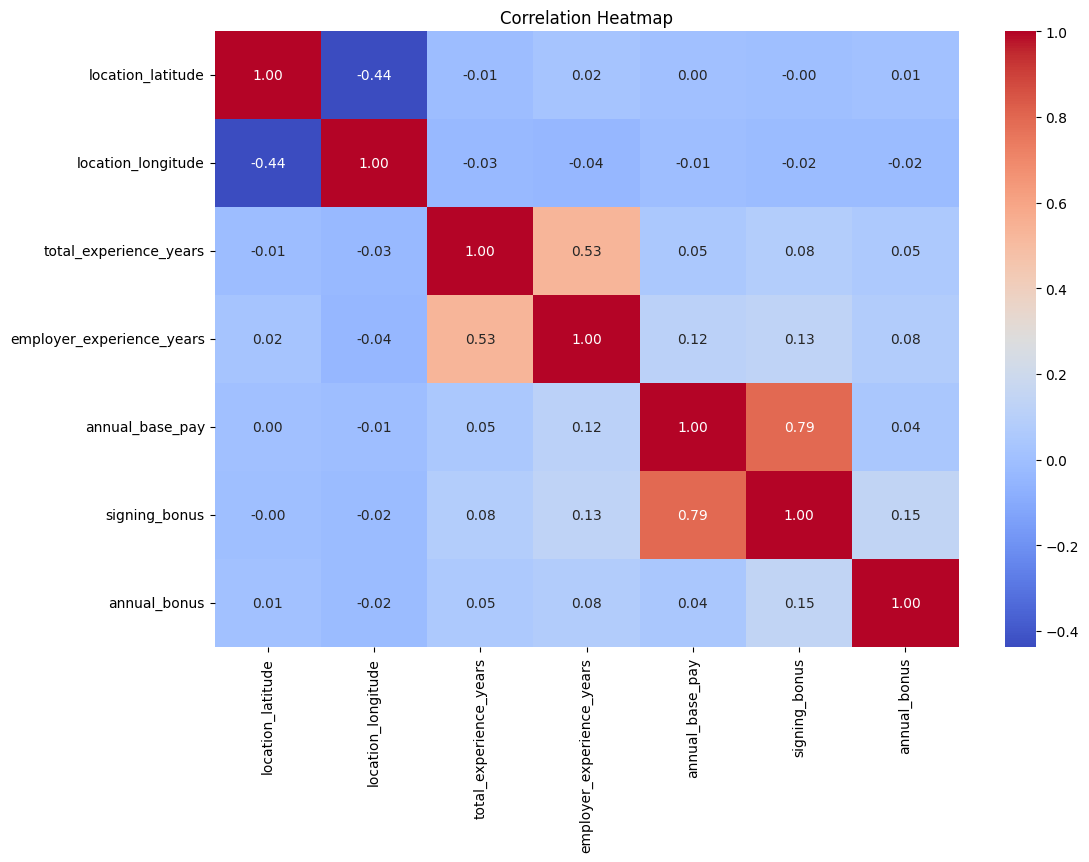

In [ ]:
# Correlation heatmap to see relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for visualizing relationships
sns.pairplot(df[numerical_columns])
plt.show()

In [27]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical columns
z_scores = zscore(df[numerical_columns])

# Get the rows with Z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)
df_no_outliers = df[~outliers.any(axis=1)]  # Remove outliers

print(f"Removed {len(df) - len(df_no_outliers)} outliers")

Removed 118 outliers


In [29]:
# Apply log transformation to skewed columns
df['annual_base_pay'] = np.log1p(df['annual_base_pay'])  # log(1 + x)

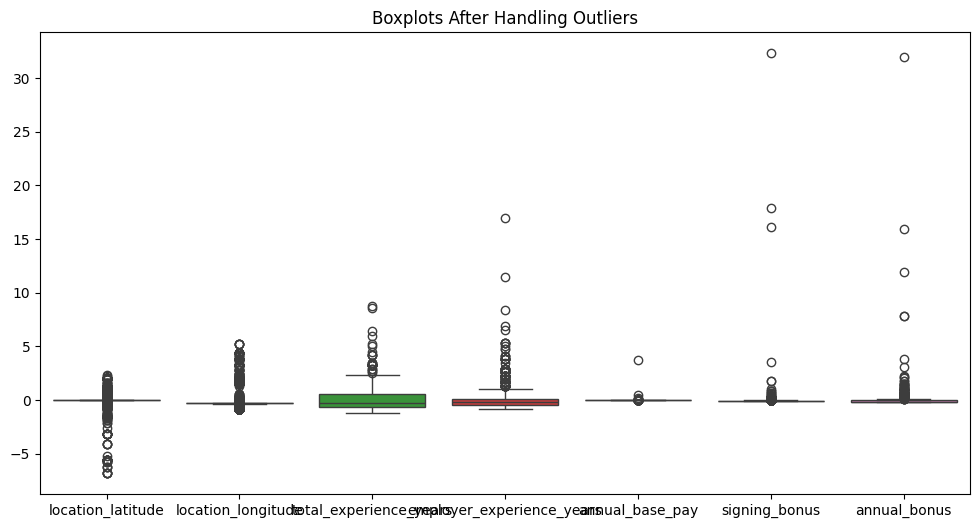

In [31]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplots After Handling Outliers")
plt.show()

In [33]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows that are outside the acceptable range
df_no_outliers_iqr = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Removed {len(df) - len(df_no_outliers_iqr)} outliers using IQR method")

Removed 1033 outliers using IQR method


In [35]:
print(df_no_outliers[numerical_columns].describe())

       location_latitude  location_longitude  total_experience_years  \
count        1537.000000         1537.000000             1537.000000   
mean            0.161799           -0.156073               -0.078455   
std             0.498302            0.645038                0.816938   
min            -2.581807           -0.849611               -1.195086   
25%             0.010155           -0.314649               -0.660471   
50%             0.010155           -0.314649               -0.304061   
75%             0.060266           -0.314649                0.408759   
max             2.342921            2.821401                2.903629   

       employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  
count                1537.000000      1537.000000    1537.000000   1537.000000  
mean                   -0.084231        -0.024741      -0.043146     -0.049741  
std                     0.656702         0.016252       0.080873      0.224573  
min                    -0.7

In [37]:
# Example of removing outliers using Z-score method
z_scores = zscore(df[numerical_columns])
outliers = (z_scores > 3) | (z_scores < -3)

# Remove rows with outliers
df_no_outliers = df[~outliers.any(axis=1)]

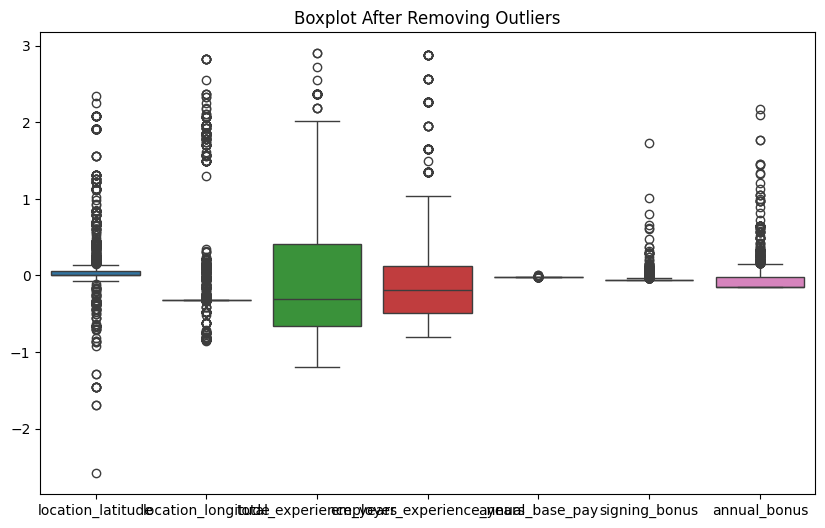

In [39]:
# Boxplot with outliers manually set to be removed
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[numerical_columns])  # Plot without outliers
plt.title("Boxplot After Removing Outliers")
plt.show()

In [41]:
print(df_no_outliers[numerical_columns].describe())

       location_latitude  location_longitude  total_experience_years  \
count        1536.000000         1536.000000             1536.000000   
mean            0.161898           -0.155970               -0.077728   
std             0.498449            0.645235                0.816706   
min            -2.581807           -0.849611               -1.195086   
25%             0.010155           -0.314649               -0.660471   
50%             0.010155           -0.314649               -0.304061   
75%             0.062210           -0.314649                0.408759   
max             2.342921            2.821401                2.903629   

       employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  
count                1536.000000      1536.000000    1536.000000   1536.000000  
mean                   -0.083825        -0.025477      -0.043132     -0.049674  
std                     0.656723         0.001568       0.080898      0.224630  
min                    -0.7

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# # Assuming df is your DataFrame and it's already loaded

# 1. Handle Missing Values (if you haven't done it already)
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

# Fill missing numerical values with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing categorical values with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Handle Negative Values:
# Replace negative values with the minimum sensible value for experience years
df['total_experience_years'] = df['total_experience_years'].apply(lambda x: x if x >= 0 else 0)
df['employer_experience_years'] = df['employer_experience_years'].apply(lambda x: x if x >= 0 else 0)

# 3. Handle Outliers:
# Cap outliers at the 1st and 99th percentiles for the relevant numerical columns
lower_limit = df[numerical_columns].quantile(0.01)
upper_limit = df[numerical_columns].quantile(0.99)

# Apply the cap to each numerical column
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name]))

# 4. Scale the Numerical Data:
# Use StandardScaler to scale the numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the cleaned dataframe description to check the results
print(df[numerical_columns].describe())


       location_latitude  location_longitude  total_experience_years  \
count       1.655000e+03        1.655000e+03            1.655000e+03   
mean       -1.717324e-17       -1.717324e-17            3.005317e-17   
std         1.000302e+00        1.000302e+00            1.000302e+00   
min        -5.796362e+00       -8.421025e-01           -5.352465e-01   
25%         5.529258e-03       -3.160074e-01           -5.352465e-01   
50%         5.529258e-03       -3.160074e-01           -5.352465e-01   
75%         5.529258e-03       -2.747774e-01            3.535166e-01   
max         2.147766e+00        4.425445e+00            4.401004e+00   

       employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  
count               1.655000e+03     1.655000e+03   1.655000e+03  1.655000e+03  
mean                1.395326e-17     2.891544e-15  -1.030394e-16 -2.575986e-17  
std                 1.000302e+00     1.000302e+00   1.000302e+00  1.000302e+00  
min                -4.04108

C:\Users\khali\AppData\Local\Temp\ipykernel_9208\2740375152.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


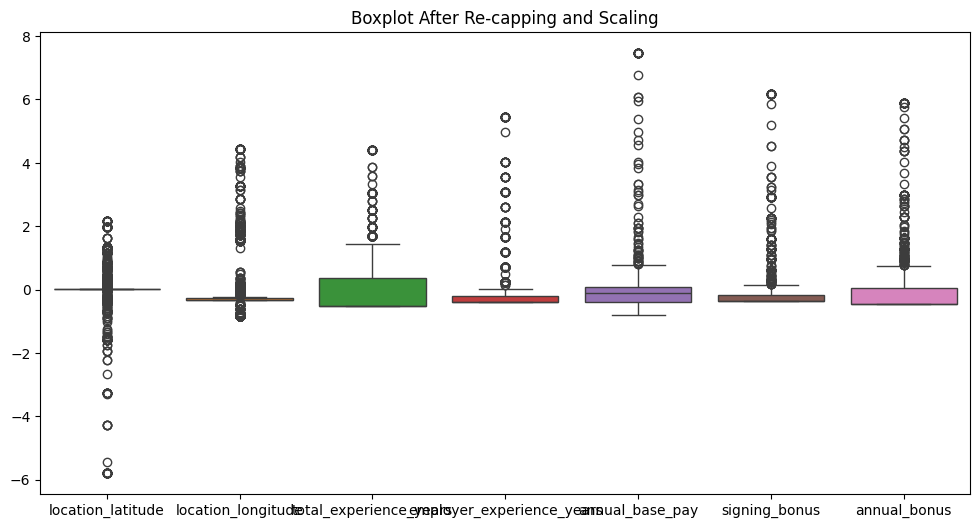

       location_latitude  location_longitude  total_experience_years  \
count        1655.000000        1.655000e+03            1.655000e+03   
mean            0.000000       -1.717324e-17            2.575986e-17   
std             1.000302        1.000302e+00            1.000302e+00   
min            -5.796362       -8.421025e-01           -5.352465e-01   
25%             0.005529       -3.160074e-01           -5.352465e-01   
50%             0.005529       -3.160074e-01           -5.352465e-01   
75%             0.005529       -2.747774e-01            3.535166e-01   
max             2.147766        4.425445e+00            4.401004e+00   

       employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  
count               1.655000e+03     1.655000e+03   1.655000e+03  1.655000e+03  
mean                1.395326e-17    -2.146655e-18  -5.366637e-18  2.575986e-17  
std                 1.000302e+00     1.000302e+00   1.000302e+00  1.000302e+00  
min                -4.04108

In [45]:
# Re-cap outliers for numerical columns at the 1st and 99th percentiles
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years',
                     'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Find the new lower and upper percentiles
lower_limit = df[numerical_columns].quantile(0.01)
upper_limit = df[numerical_columns].quantile(0.99)

# Cap the outliers at the 1st and 99th percentiles for each column
df[numerical_columns] = df[numerical_columns].apply(lambda x: np.clip(x, lower_limit[x.name], upper_limit[x.name]))

# 2. Re-Scale the Numerical Data After Handling Outliers
scaler = StandardScaler()
df_scaled = df[numerical_columns].copy()

# Apply scaling to the cleaned data
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Optional: You can keep the scaled data separately for clustering
df[numerical_columns] = df_scaled

# Visualize the boxplot after outlier handling and scaling
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot After Re-capping and Scaling")
plt.show()

# Check summary statistics again
print(df[numerical_columns].describe())

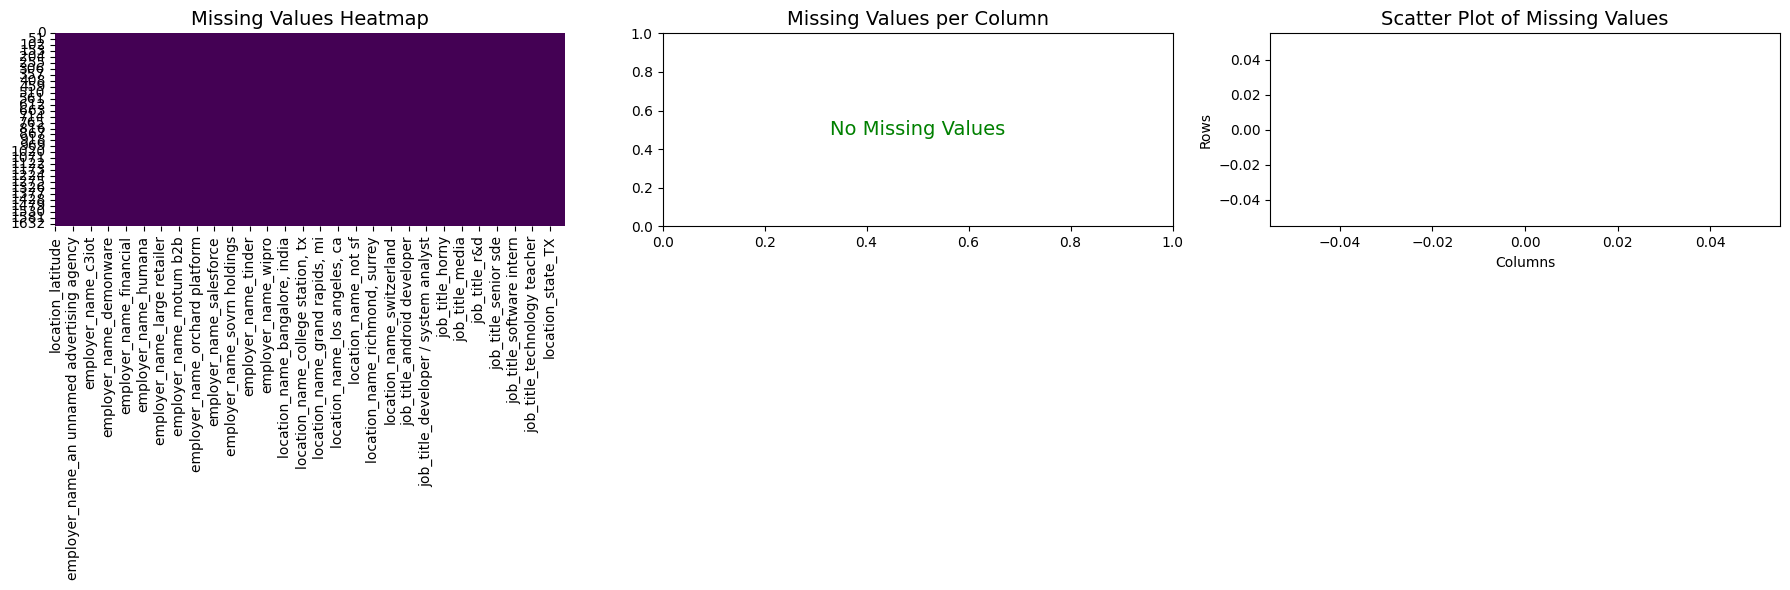

In [47]:
# Create the subplots for the heatmap, bar chart, and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# 1. Heatmap of missing values
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)

# 2. Bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only columns with missing values

# Check if there are any missing values before plotting the bar chart
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)

# 3. Scatter plot of missing values (showing rows and columns with missing data)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')

# Show the plot
plt.tight_layout()  # Adjusts layout for better spacing
plt.show()

Text(0.5, 0.98, 'Histograms of Numerical Columns')

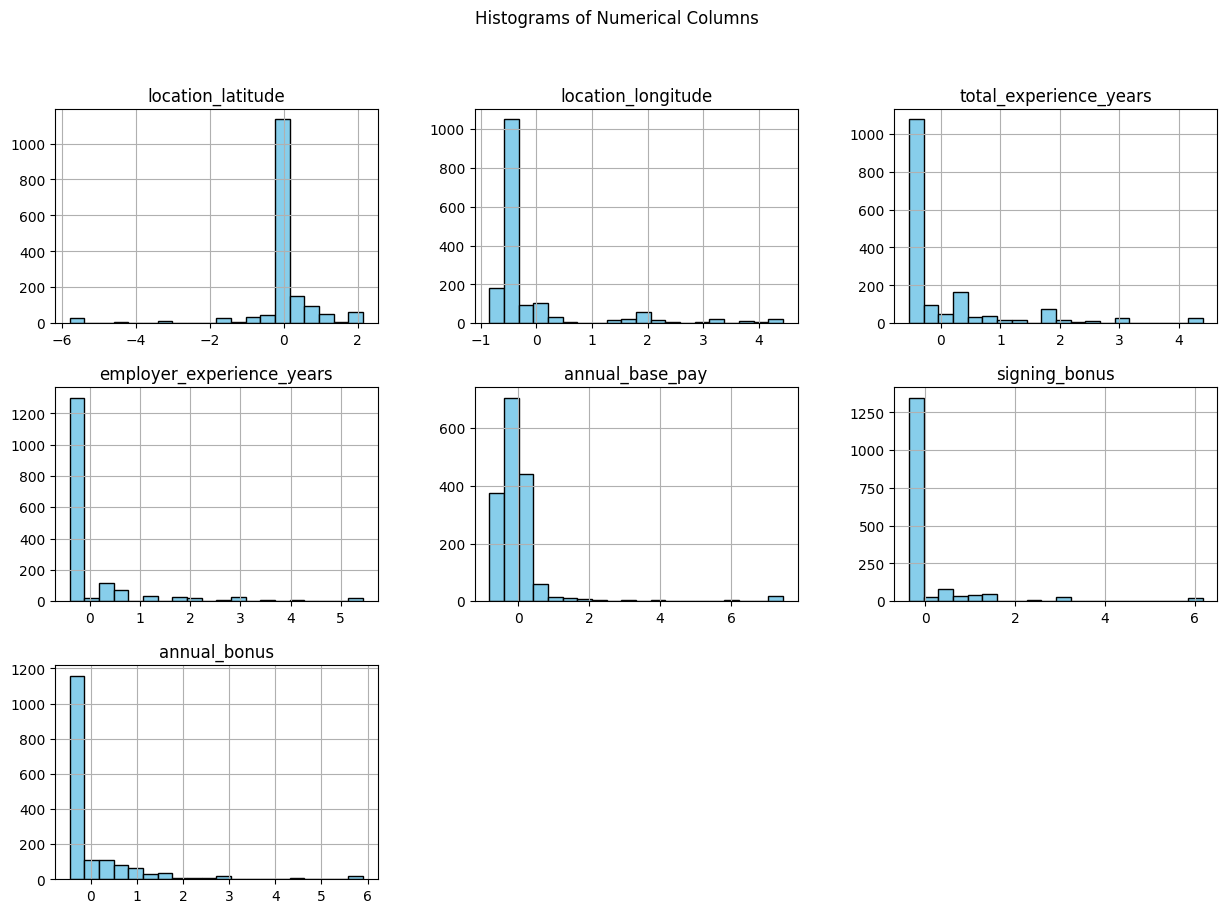

In [48]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")

In [51]:
df['annual_base_pay'].var()

1.0006045949214035

In [93]:
df['annual_bonus'].var()

1.000604594921395

KeyError: 'Cluster'

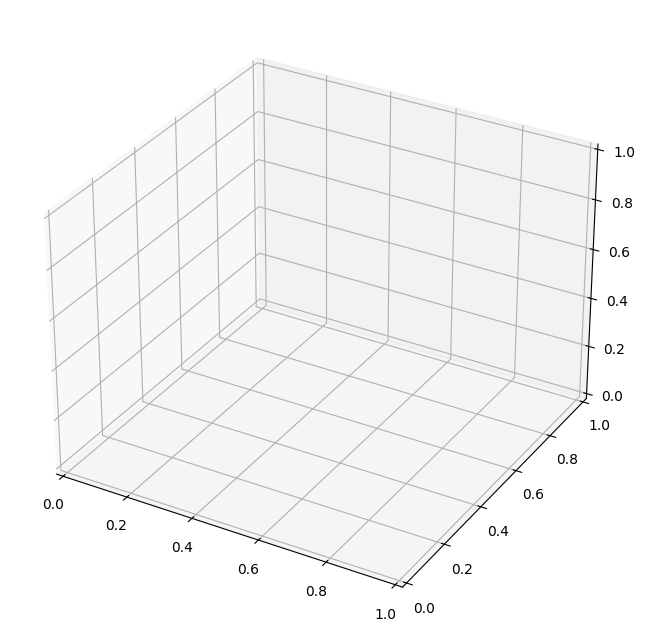

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot (Location Latitude, Location Longitude, Total Experience Years)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points with colors based on 'Cluster'
scatter = ax.scatter(df['location_latitude'], df['location_longitude'], df['total_experience_years'], 
                     c=df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Location Latitude')
ax.set_ylabel('Location Longitude')
ax.set_zlabel('Total Experience Years')
ax.set_title('3D Scatter Plot of Clusters')
plt.colorbar(scatter)

In [104]:
df.describe()

,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,Cluster
count,1655.000000,1.655000e+03,1.655000e+03,1.655000e+03,1655.000000,1.655000e+03,1.655000e+03,1655.000000
mean,0.000000,-8.586619e-18,-4.293310e-18,1.073327e-17,0.000000,-3.219982e-18,-1.931989e-17,0.632024
std,1.000302,1.000302e+00,1.000302e+00,1.000302e+00,1.000302,1.000302e+00,1.000302e+00,1.228172
min,-5.796362,-8.421025e-01,-4.280040e-01,-3.311092e-01,-0.812333,-3.585566e-01,-4.557828e-01,0.000000
25%,0.005529,-3.160074e-01,-4.280040e-01,-3.311092e-01,-0.390585,-3.585566e-01,-4.557828e-01,0.000000
50%,0.005529,-3.160074e-01,-4.280040e-01,-3.311092e-01,-0.121563,-3.585566e-01,-4.557828e-01,0.000000
75%,0.005529,-2.747774e-01,-2.079019e-03,-3.311092e-01,0.085736,-1.624485e-01,3.628448e-02,0.000000
max,2.147766,4.425445e+00,4.874428e+00,5.765249e+00,7.462449,6.178380e+00,5.898174e+00,4.000000


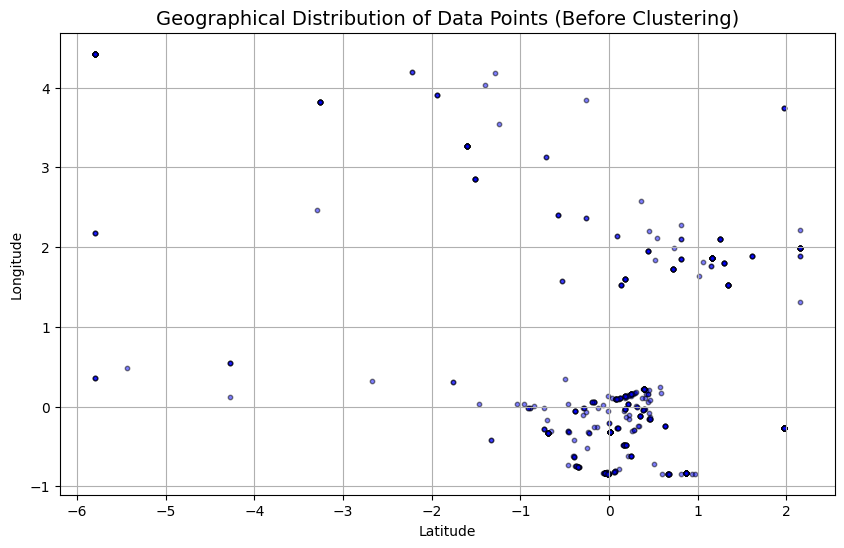

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['location_latitude'], df['location_longitude'], alpha=0.5, c='blue', edgecolors='k', s=10)
plt.title('Geographical Distribution of Data Points (Before Clustering)', fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

C:\Users\khali\AppData\Local\Temp\ipykernel_9208\781658534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='counts', y=location_counts.index, data=location_counts, palette='viridis')


Text(0, 0.5, 'Location Index (Latitude, Longitude)')

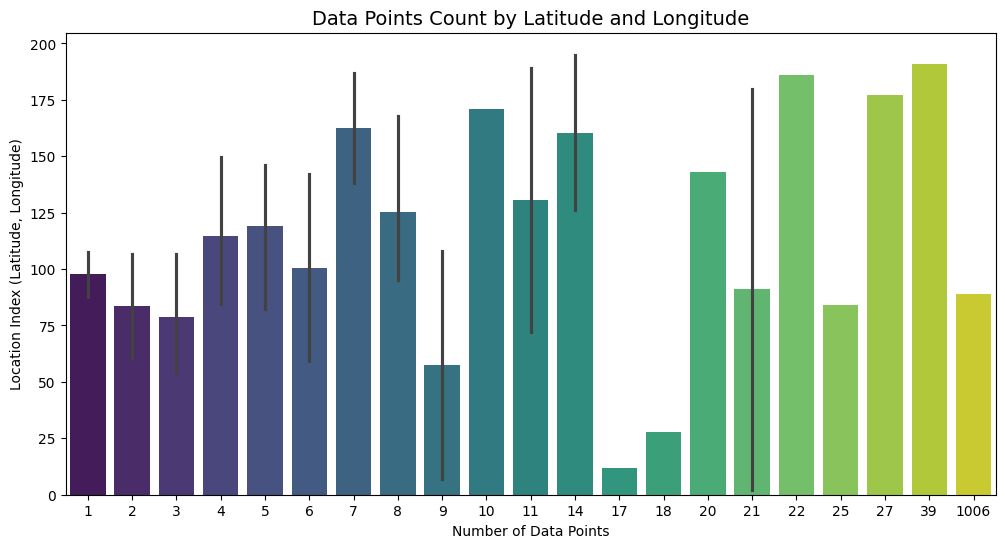

In [57]:
# Create a new DataFrame that counts the occurrences of each (latitude, longitude) pair
location_counts = df.groupby(['location_latitude', 'location_longitude']).size().reset_index(name='counts')

# Sort values to make the bar plot easier to read
location_counts = location_counts.sort_values('counts', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='counts', y=location_counts.index, data=location_counts, palette='viridis')
plt.title('Data Points Count by Latitude and Longitude', fontsize=14)
plt.xlabel('Number of Data Points')
plt.ylabel('Location Index (Latitude, Longitude)')

Cluster Centers:
[[ 0.17185937 -0.15978529 -0.18870809 -0.23208141 -0.13650417 -0.02436508
  -0.10854823]
 [-3.47254034  3.34773562 -0.18002547 -0.2195737   0.03296949 -0.21648147
  -0.26854287]
 [ 0.12498591 -0.17316227  1.77136744  2.17763021  1.20333483  0.32107553
   1.0977846 ]]


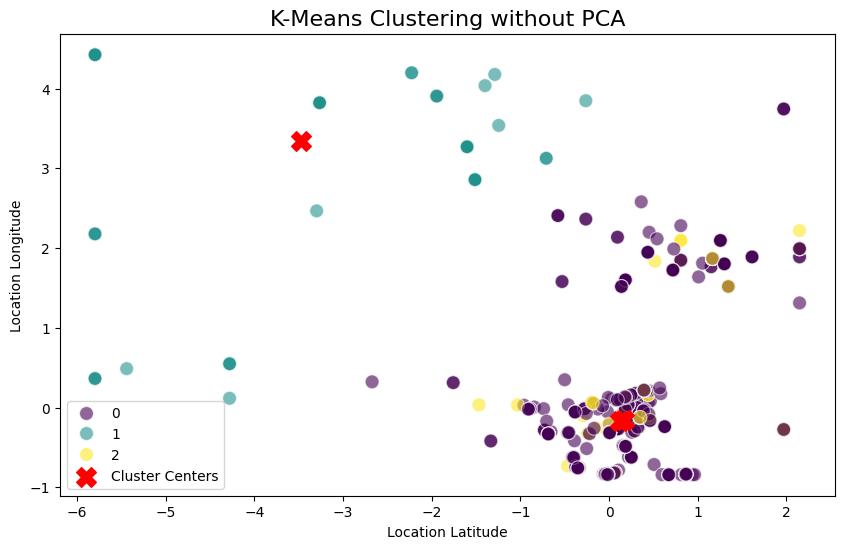

Cluster
0    1420
2     159
1      76
Name: count, dtype: int64


In [59]:
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 
                     'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Define the number of clusters (you can choose any K based on your analysis)
k = 3  # Example: Choosing 3 clusters

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

# Add the cluster information to the original dataframe
df['Cluster'] = df['Cluster'].astype(int)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Now you can visualize the clusters (e.g., with a scatter plot)
plt.figure(figsize=(10, 6))

# Plot the clusters (2D scatter of location_latitude vs location_longitude)
sns.scatterplot(x='location_latitude', y='location_longitude', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Optional: Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('K-Means Clustering without PCA', fontsize=16)
plt.xlabel('Location Latitude')
plt.ylabel('Location Longitude')
plt.legend()
plt.show()

# You can check the distribution of clusters
print(df['Cluster'].value_counts())

Cluster Centers:
[[-6.62338161e-04  1.46647226e-02 -2.21894375e-01 -2.43982062e-01
  -1.60146923e-01 -6.84388626e-02 -1.53653154e-01]
 [ 4.71104251e-03 -1.04306434e-01  1.57827813e+00  1.73538222e+00
   1.13908424e+00  4.86788184e-01  1.09289572e+00]]


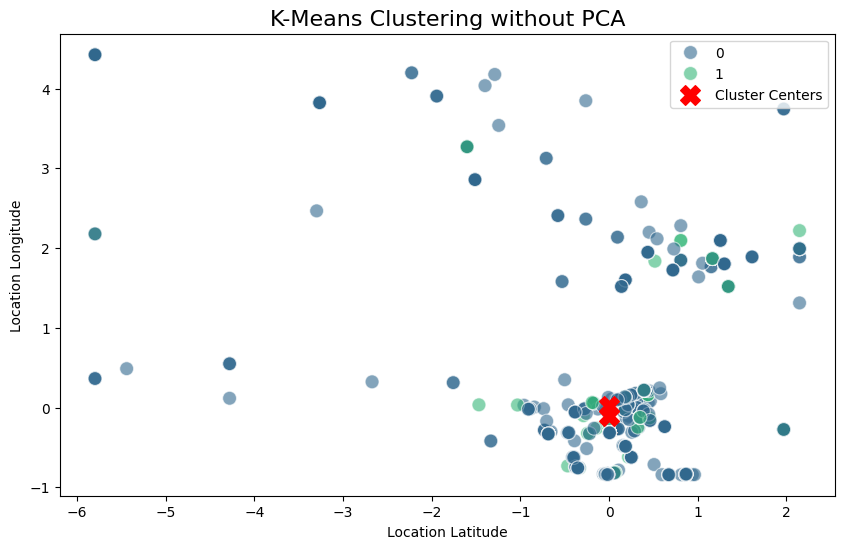

Cluster
0    1451
1     204
Name: count, dtype: int64


In [61]:
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 
                     'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Define the number of clusters (you can choose any K based on your analysis)
k = 2  # Example: Choosing 2 clusters

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

# Add the cluster information to the original dataframe
df['Cluster'] = df['Cluster'].astype(int)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Now you can visualize the clusters (e.g., with a scatter plot)
plt.figure(figsize=(10, 6))

# Plot the clusters (2D scatter of location_latitude vs location_longitude)
sns.scatterplot(x='location_latitude', y='location_longitude', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Optional: Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('K-Means Clustering without PCA', fontsize=16)
plt.xlabel('Location Latitude')
plt.ylabel('Location Longitude')
plt.legend()
plt.show()

# You can check the distribution of clusters
print(df['Cluster'].value_counts())

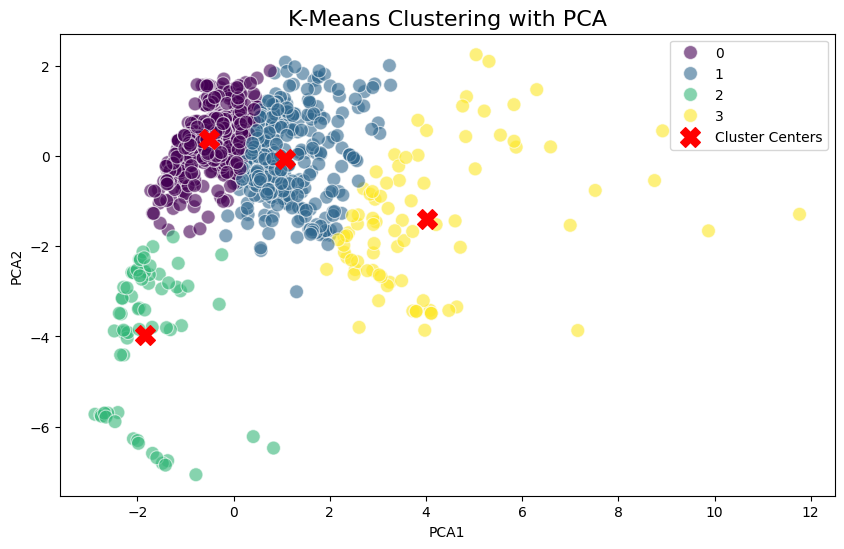

Cluster
0    1138
1     359
3      84
2      74
Name: count, dtype: int64


In [63]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Apply PCA to reduce the dimensions to 2 (for easy visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Apply K-Means clustering to the PCA components
k = 4  # Example: Choosing 4 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)

# Add PCA components to the dataframe for visualization
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot the clusters in the reduced 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Plot the cluster centers in PCA space
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('K-Means Clustering with PCA', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Print cluster counts
print(df['Cluster'].value_counts())

In [160]:
# # Apply PCA to reduce the dimensions to 2 (for easy visualization)
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(scaled_data)

# # Apply K-Means clustering to the PCA components
# k = 5  # Example: Choosing 4 clusters
# kmeans = KMeans(n_clusters=k, random_state=42)
# df['Cluster'] = kmeans.fit_predict(pca_components)

# # Add PCA components to the dataframe for visualization
# df['PCA1'] = pca_components[:, 0]
# df['PCA2'] = pca_components[:, 1]

# # Plot the clusters in the reduced 2D PCA space with boundaries
# plt.figure(figsize=(10, 6))

# # Generate a grid for plotting decision boundaries
# x_min, x_max = df['PCA1'].min() - 1, df['PCA1'].max() + 1
# y_min, y_max = df['PCA2'].min() - 1, df['PCA2'].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# # Predict the cluster labels for each point on the grid
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot the decision boundary
# plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# # Plot the clusters in the PCA space
# sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# # Plot the cluster centers in PCA space
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')

# plt.title('K-Means Clustering with PCA and Decision Boundaries', fontsize=16)
# plt.xlabel('PCA1')
# plt.ylabel('PCA2')
# plt.legend()
# plt.show()

# # Print cluster counts
# print(df['Cluster'].value_counts())

In [65]:
from sklearn.manifold import TSNE

ValueError: perplexity must be less than n_samples

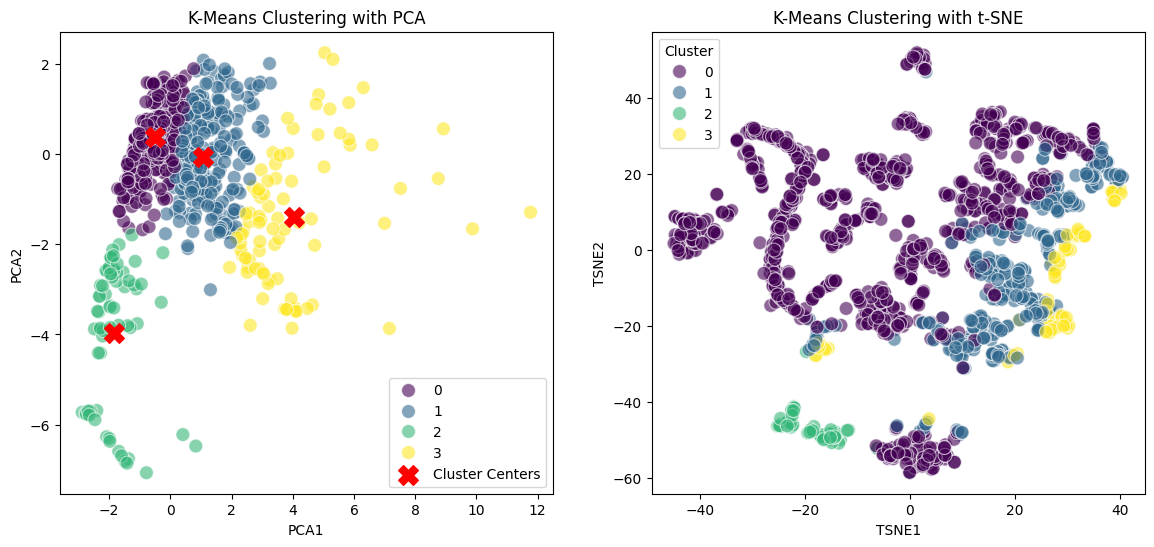

In [67]:
# Select the numerical columns for clustering
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 
                     'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Apply PCA to reduce the dimensions to 2 (for easy visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Apply K-Means clustering to the PCA components
k = 4  # Example: Choosing 4 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)

# Apply t-SNE for further dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

# Add PCA and t-SNE components to the dataframe for visualization
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]

# Plot PCA clusters with decision boundary
plt.figure(figsize=(14, 6))

# First subplot: PCA clustering visualization
plt.subplot(1, 2, 1)
plt.title('K-Means Clustering with PCA')
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Plot the cluster centers in PCA space
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

# Second subplot: t-SNE clustering visualization
plt.subplot(1, 2, 2)
plt.title('K-Means Clustering with t-SNE')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Plot the cluster centers in t-SNE space
centers_tsne = tsne.fit_transform(kmeans.cluster_centers_)
plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()

plt.tight_layout()
plt.show()

# Print cluster counts
print(df['Cluster'].value_counts())

In [154]:
# sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette="Set1", s=100, edgecolor='black')

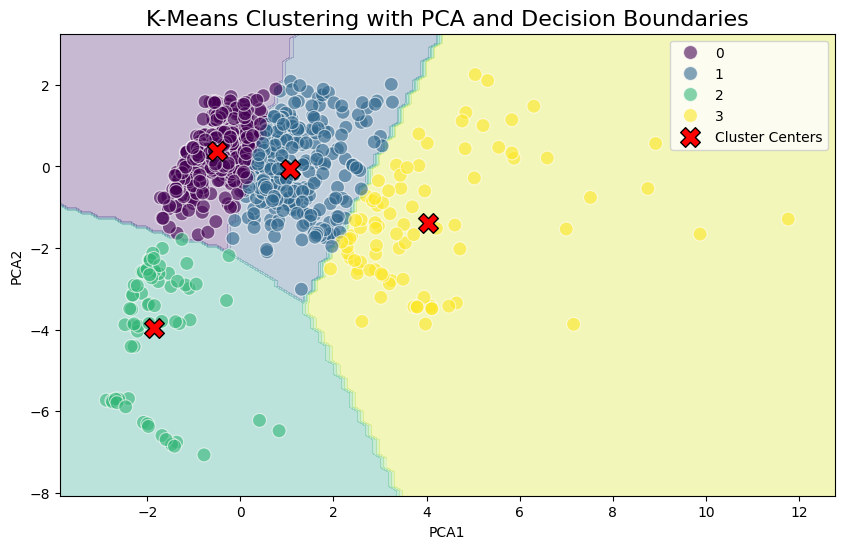

C:\Users\khali\AppData\Local\Temp\ipykernel_9208\995349387.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


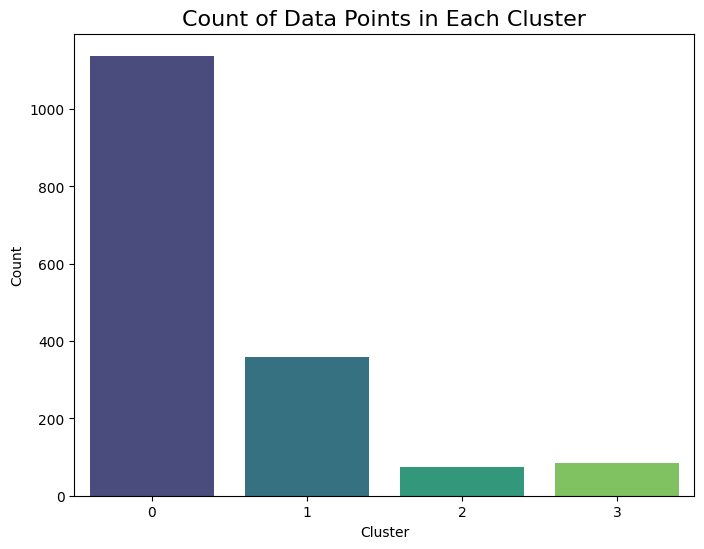

Cluster
0    1138
1     359
3      84
2      74
Name: count, dtype: int64


In [69]:
plt.figure(figsize=(10, 6))

# Generate a grid for plotting decision boundaries
x_min, x_max = df['PCA1'].min() - 1, df['PCA1'].max() + 1
y_min, y_max = df['PCA2'].min() - 1, df['PCA2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the clusters in the PCA space
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Plot the cluster centers in PCA space
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')

plt.title('K-Means Clustering with PCA and Decision Boundaries', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Plot a bar chart for the count of data points in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Count of Data Points in Each Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Print cluster counts
print(df['Cluster'].value_counts())

In [164]:
# # Plot a boxplot showing the distribution of numerical features across clusters
# plt.figure(figsize=(12, 8))

# # List of numerical columns you want to visualize across clusters
# numerical_columns = ['total_experience_years', 'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# # Create a boxplot for each numerical feature across clusters
# for i, column in enumerate(numerical_columns, 1):
#     plt.subplot(2, 3, i)  # Create subplots in a 2x3 grid
#     sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')
#     plt.title(f'{column} Distribution Across Clusters', fontsize=14)
#     plt.xlabel('Cluster')
#     plt.ylabel(column)

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()

In [71]:
# List of numerical columns for the statistical summary
columns_to_include = ['total_experience_years', 'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Displaying statistical summary for each cluster
for cluster_num in range(k):  # Adjust this to the number of clusters (k in your case)
    print(f"Statistical Summary for Cluster {cluster_num}:")
    
    # Filter the data for the current cluster
    cluster_data = df[df['Cluster'] == cluster_num]  # Use the 'Cluster' column for filtering
    
    # Display statistical summary for the cluster
    display(cluster_data[columns_to_include].describe())  # Adjust columns_to_include as needed
    print("\n")

Statistical Summary for Cluster 0:


,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,-0.378627,-0.295059,-0.205948,-0.176677,-0.258421
std,0.356933,0.280089,0.339815,0.436047,0.387900
min,-0.535246,-0.404109,-0.812337,-0.358557,-0.455687
25%,-0.535246,-0.404109,-0.424126,-0.358557,-0.455687
50%,-0.535246,-0.404109,-0.225221,-0.358557,-0.455687
75%,-0.535246,-0.404109,-0.017910,-0.293187,-0.248715
max,1.972512,1.668732,2.295303,2.909912,1.614030




Statistical Summary for Cluster 1:


,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.723361,0.358190,0.329670,0.421918,0.457398
std,1.165944,1.101653,1.240415,1.490684,1.172325
min,-0.535246,-0.404109,-0.812337,-0.358557,-0.455687
25%,-0.495614,-0.404109,-0.062825,-0.358557,-0.455687
50%,0.353517,-0.219587,0.085736,-0.358557,0.103137
75%,1.702679,0.724572,0.279191,0.621984,0.924124
max,4.401004,5.445369,7.462449,6.178380,5.901663




Statistical Summary for Cluster 2:


,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,-0.162061,-0.212093,-0.216250,-0.345147,-0.338069
std,0.774505,0.430390,1.091502,0.043288,0.265326
min,-0.535246,-0.404109,-0.812337,-0.358557,-0.455687
25%,-0.535246,-0.404109,-0.650982,-0.358557,-0.455687
50%,-0.535246,-0.404109,-0.484397,-0.358557,-0.455687
75%,-0.186148,-0.219587,-0.190668,-0.358557,-0.360825
max,3.051842,2.140811,7.462449,-0.162449,0.924124




Statistical Summary for Cluster 3:


,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2.180748,2.653357,1.571660,0.894418,1.843987
std,1.654759,2.133917,2.660898,2.373824,2.554415
min,-0.535246,-0.404109,-0.811915,-0.358557,-0.455687
25%,0.893182,0.724572,-0.111197,-0.358557,-0.455687
50%,1.972512,3.084971,0.465715,-0.358557,0.579171
75%,3.658965,5.091309,2.228455,0.621984,4.408147
max,4.401004,5.445369,7.462449,6.178380,5.901663


In [73]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3674194122641804


In [75]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.8910366855217213


In [77]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(df_scaled, df['Cluster'])
print(f"Calinski-Harabasz Score: {ch_score}")

Calinski-Harabasz Score: 317.19087032404695


Hopkins Statistic: 1.0


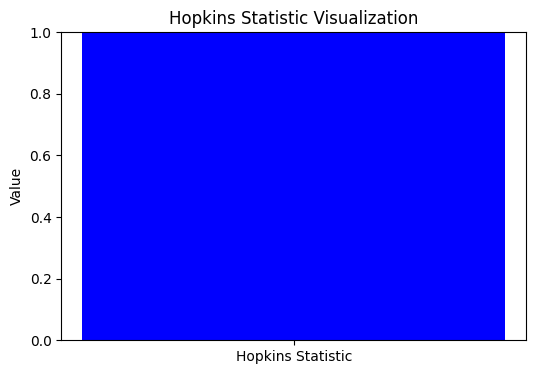

In [79]:
from sklearn.neighbors import NearestNeighbors
numeric_columns = df.select_dtypes(include=[np.number]).columns
def hopkins_statistic(X):
    """ Calculate the Hopkins Statistic to assess the clusterability of data """
    d = X.shape[1]  # Number of dimensions (features)
    n = len(X)  # Number of points
    m = int(0.1 * n)  # Take 10% of the data points as the sample size

    # Initialize NearestNeighbors to calculate nearest distances
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    uj = 0.0
    wj = 0.0
    for j in range(m):
        # Calculate the distance to the nearest point for a random point
        u_dist, _ = nbrs.kneighbors(np.random.uniform(X.min(), X.max(), (1, d)), return_distance=True)
        uj += u_dist[0][0]
        # Calculate the distance to the nearest point for actual points in the dataset
        w_dist, _ = nbrs.kneighbors(X.loc[[np.random.choice(X.index)], :].values, return_distance=True)
        wj += w_dist[0][0]

    H = uj / (uj + wj)  # Hopkins statistic formula
    return H

# Apply the function to your dataset
hopkins_stat = hopkins_statistic(df[numeric_columns])
print("Hopkins Statistic:", hopkins_stat)

# Visualize the Hopkins Statistic
plt.figure(figsize=(6, 4))
plt.bar('Hopkins Statistic', hopkins_stat, color='blue')
plt.ylim(0, 1)  # Hopkins statistic value ranges from 0 to 1
plt.ylabel('Value')
plt.title('Hopkins Statistic Visualization')
plt.show()

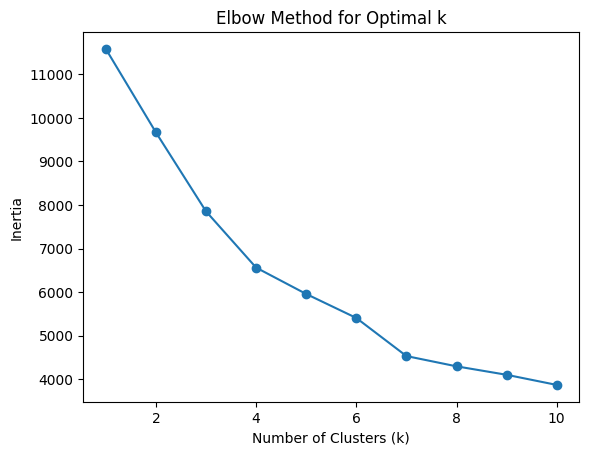

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [83]:
cluster_counts = df['Cluster'].value_counts()
print("Cluster Size Distribution:\n", cluster_counts)

Cluster Size Distribution:
 Cluster
0    1138
1     359
3      84
2      74
Name: count, dtype: int64


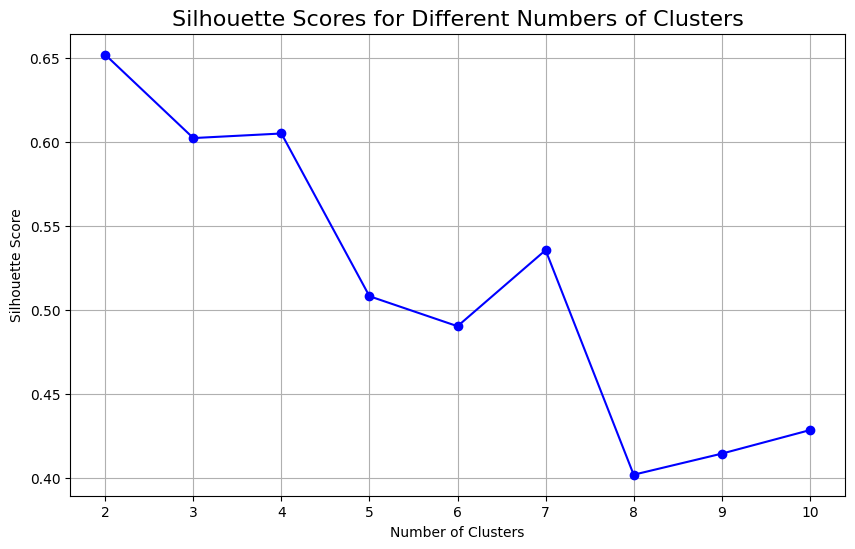

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming your dataset is scaled and is stored in 'scaled_data' or use relevant features
X = df[['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 'annual_base_pay']].dropna().values

# Range for number of clusters to test
range_n_clusters = list(range(2, 11))  # Cluster counts from 2 to 10 (you can adjust this range)

# Create a list to store the silhouette scores
sil_scores = []

# Loop through the different cluster counts
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    score = silhouette_score(X, cluster_labels)
    sil_scores.append(score)

# Plotting the silhouette scores for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Numbers of Clusters', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

C:\Users\khali\AppData\Local\Temp\ipykernel_9208\1822350451.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(4), y=cluster_silhouette_avg, palette='viridis')


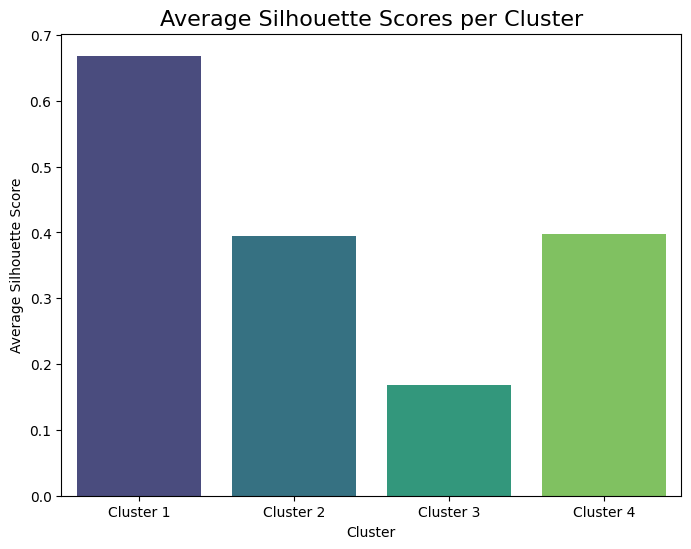

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

# Assuming your dataset is scaled and stored in 'scaled_data' or relevant features
X = df[['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 'annual_base_pay']].dropna().values

# Perform KMeans clustering (you can replace with your cluster count from earlier)
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change the number of clusters here
cluster_labels = kmeans.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)

# Calculate the average silhouette score for each cluster
cluster_silhouette_avg = []
for i in range(4):  # Number of clusters
    cluster_silhouette_avg.append(np.mean(silhouette_vals[cluster_labels == i]))

# Create a bar plot for silhouette scores of each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(4), y=cluster_silhouette_avg, palette='viridis')

# Set plot labels and title
plt.title('Average Silhouette Scores per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Average Silhouette Score')
plt.xticks(np.arange(4), labels=[f'Cluster {i+1}' for i in range(4)])

plt.show()

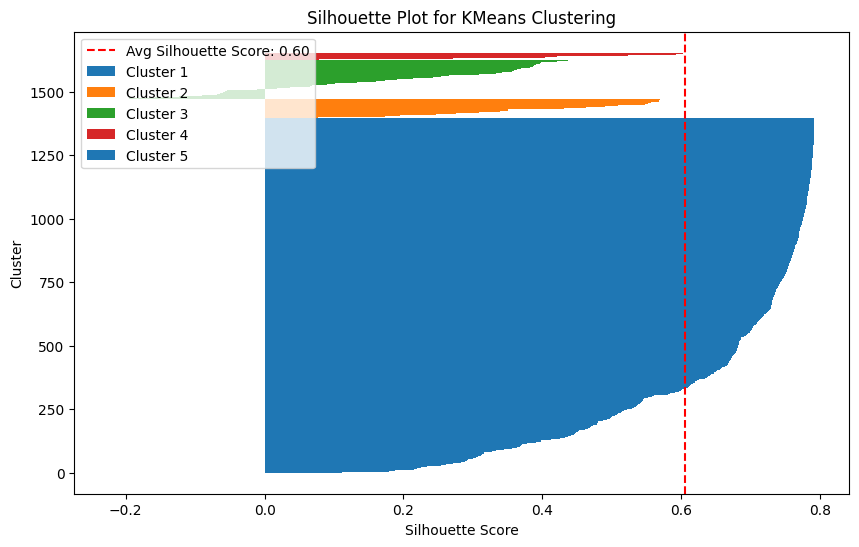

In [95]:
X = df[['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 'annual_base_pay']].dropna().values

# Perform KMeans clustering (you can replace with your cluster count from earlier)
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change the number of clusters here
cluster_labels = kmeans.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)

# Create a figure
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
y_lower, y_upper = 0, 0
for i in range(5):  # Number of clusters
    # Get the silhouette scores for each sample in this cluster
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    
    # Sort the silhouette values
    cluster_silhouette_vals.sort()
    
    # Set the y position for each cluster's bar plot
    y_upper += len(cluster_silhouette_vals)
    
    # Create the silhouette bar plot for this cluster
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, label=f'Cluster {i + 1}')
    
    # Move the lower bound for the next cluster
    y_lower = y_upper

# Add vertical line for average silhouette score
avg_score = silhouette_score(X, cluster_labels)
plt.axvline(avg_score, color="red", linestyle="--", label=f'Avg Silhouette Score: {avg_score:.2f}')

# Set the plot labels and title
plt.title('Silhouette Plot for KMeans Clustering', fontsize=12)
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster')
plt.legend(loc='upper left')

# Show the plot
plt.show()


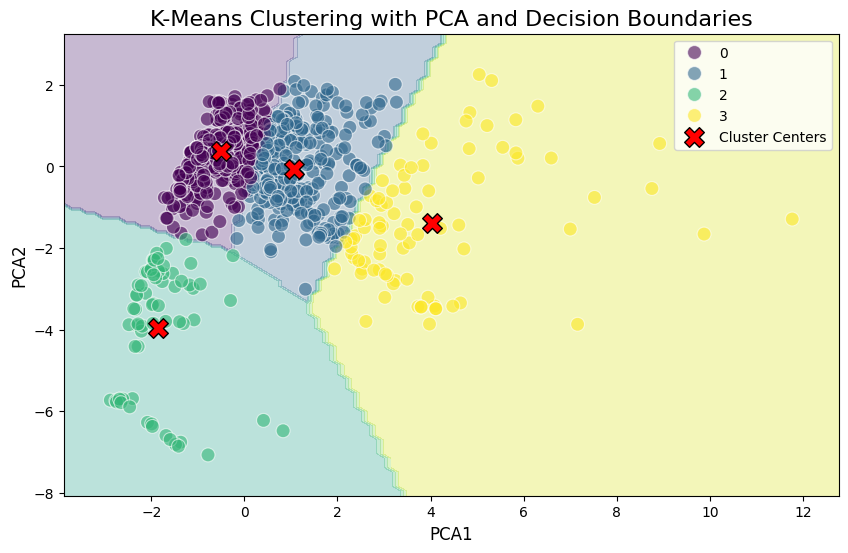

Cluster
0    1138
1     359
3      84
2      74
Name: count, dtype: int64


In [99]:
# Apply PCA to reduce the dimensions to enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(df_scaled)

# Now you will have more than 2 dimensions. To visualize, reduce it to 2D
pca_2d = pca_components[:, :2]  # Take the first two principal components

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_2d)

# Add PCA components to the dataframe for visualization
df['PCA1'] = pca_2d[:, 0]
df['PCA2'] = pca_2d[:, 1]

# Plot the clusters in the reduced 2D PCA space with boundaries
plt.figure(figsize=(10, 6))

# Generate a grid for plotting decision boundaries
x_min, x_max = df['PCA1'].min() - 1, df['PCA1'].max() + 1
y_min, y_max = df['PCA2'].min() - 1, df['PCA2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the clusters in the PCA space
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)

# Plot the cluster centers in PCA space
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')

plt.title('K-Means Clustering with PCA and Decision Boundaries', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(loc='best')
plt.show()

# Print cluster counts
print(df['Cluster'].value_counts())

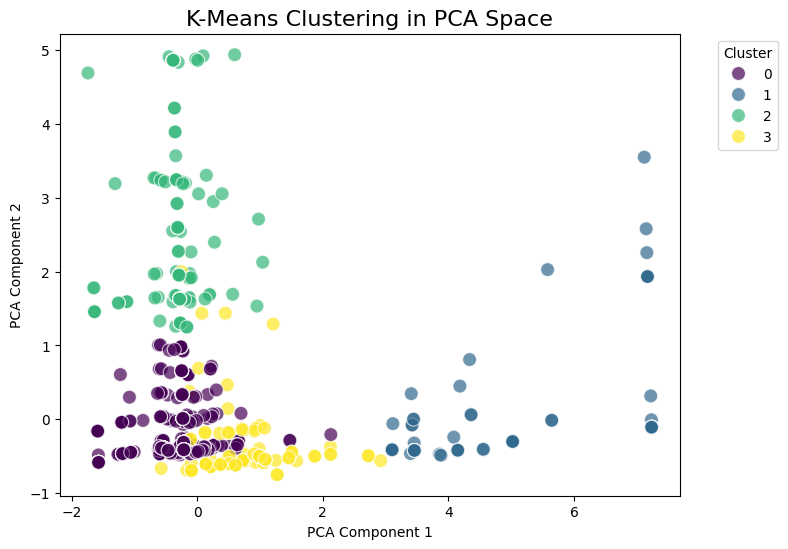

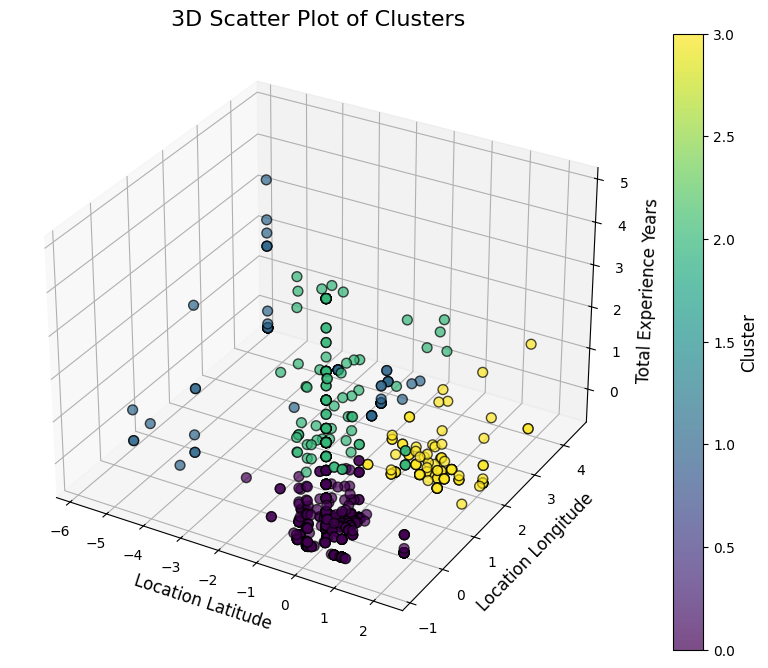

In [224]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Apply PCA to reduce dimensions for 2D plot with n_components=0.95
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(df[['location_latitude', 'location_longitude', 'total_experience_years']])

# Apply KMeans clustering (already done earlier)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)

# 1. Clustering Plot in PCA space (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in PCA Space', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. 3D Scatter Plot (Location Latitude, Location Longitude, Total Experience Years)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points with colors based on 'Cluster'
scatter = ax.scatter(df['location_latitude'], df['location_longitude'], df['total_experience_years'],
                     c=df['Cluster'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)

# Labels and Title
ax.set_xlabel('Location Latitude', fontsize=12)
ax.set_ylabel('Location Longitude', fontsize=12)
ax.set_zlabel('Total Experience Years', fontsize=12)
ax.set_title('3D Scatter Plot of Clusters', fontsize=16)

# Color bar for cluster mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)

# Show the plot
plt.show()

In [107]:
# from sklearn_extra.cluster import KMedoids
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D

# # Apply PCA to reduce dimensions for 2D plot with n_components=0.95
# pca = PCA(n_components=0.95)
# pca_components = pca.fit_transform(df[['location_latitude', 'location_longitude', 'total_experience_years']])

# # Apply K-Medoids clustering (PAM algorithm)
# kmedoids = KMedoids(n_clusters=4, random_state=42)
# df['Cluster'] = kmedoids.fit_predict(pca_components)

# # 1. Clustering Plot in PCA space (2D)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
# plt.title('PAM Clustering in PCA Space', fontsize=16)
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

# # 2. 3D Scatter Plot (Location Latitude, Location Longitude, Total Experience Years)
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter points with colors based on 'Cluster'
# scatter = ax.scatter(df['location_latitude'], df['location_longitude'], df['total_experience_years'],
#                      c=df['Cluster'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)

# # Labels and Title
# ax.set_xlabel('Location Latitude', fontsize=12)
# ax.set_ylabel('Location Longitude', fontsize=12)
# ax.set_zlabel('Total Experience Years', fontsize=12)
# ax.set_title('3D Scatter Plot of PAM Clusters', fontsize=16)

# # Color bar for cluster mapping
# cbar = plt.colorbar(scatter)
# cbar.set_label('Cluster', fontsize=12)

# # Show the plot
# plt.show()

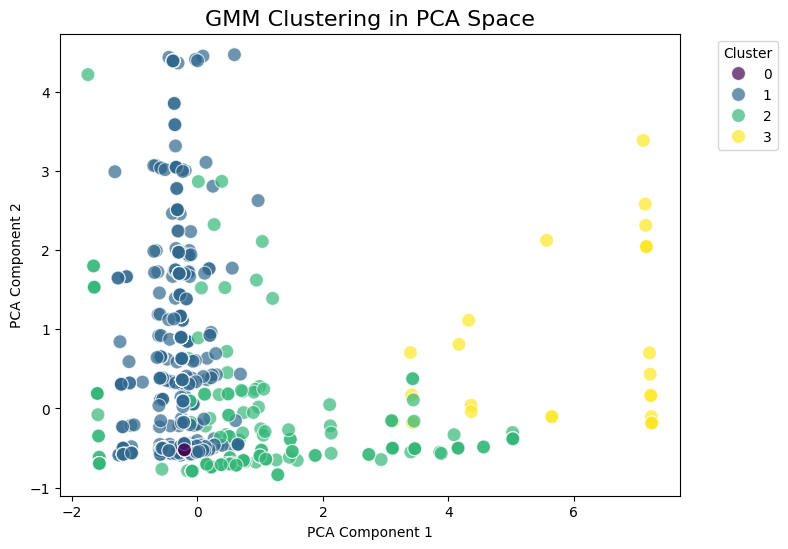

C:\Users\khali\AppData\Local\Temp\ipykernel_9208\607431840.py:39: UserWarning: Adding colorbar to a different Figure <Figure size 1200x800 with 3 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter)


<Figure size 640x480 with 0 Axes>

In [105]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce dimensions for 2D plot with n_components=0.95
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(df[['location_latitude', 'location_longitude', 'total_experience_years']])

# Apply Gaussian Mixture Model (GMM) for clustering
gmm = GaussianMixture(n_components=4, random_state=42)
df['Cluster'] = gmm.fit_predict(pca_components)

# 1. Clustering Plot in PCA space (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('GMM Clustering in PCA Space', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# # 2. 3D Scatter Plot (Location Latitude, Location Longitude, Total Experience Years)
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter points with colors based on 'Cluster'
# scatter = ax.scatter(df['location_latitude'], df['location_longitude'], df['total_experience_years'],
#                      c=df['Cluster'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)

# # Labels and Title
# ax.set_xlabel('Location Latitude', fontsize=12)
# ax.set_ylabel('Location Longitude', fontsize=12)
# ax.set_zlabel('Total Experience Years', fontsize=12)
# ax.set_title('3D Scatter Plot of GMM Clusters', fontsize=16)

# Color bar for cluster mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)

# Show the plot
plt.show()

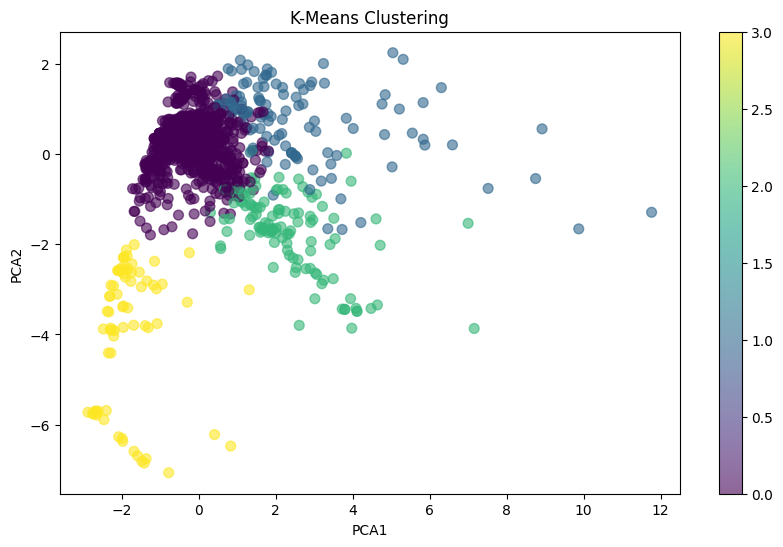

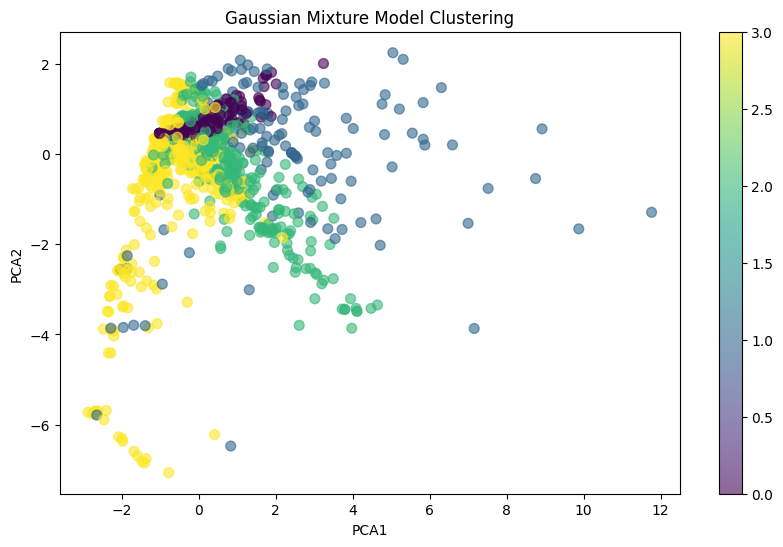

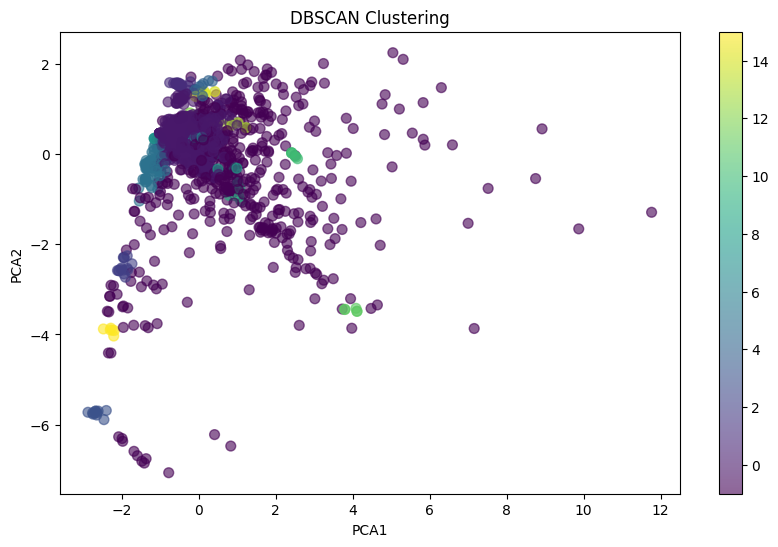

In [127]:
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(scaled_data)

# Step 3: Apply K-Means (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_components)

# Step 4: Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(pca_components)

# Step 5: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_components)

# Add the cluster labels to the dataframe
df['KMeans_Cluster'] = kmeans_labels
df['GMM_Cluster'] = gmm_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Step 6: Plot the results

# Function to plot the clustering results
def plot_clustering_result(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.colorbar()
    plt.show()

# Plot K-Means result
plot_clustering_result(pca_components, df['KMeans_Cluster'], 'K-Means Clustering')

# Plot GMM result
plot_clustering_result(pca_components, df['GMM_Cluster'], 'Gaussian Mixture Model Clustering')

# Plot DBSCAN result
plot_clustering_result(pca_components, df['DBSCAN_Cluster'], 'DBSCAN Clustering')

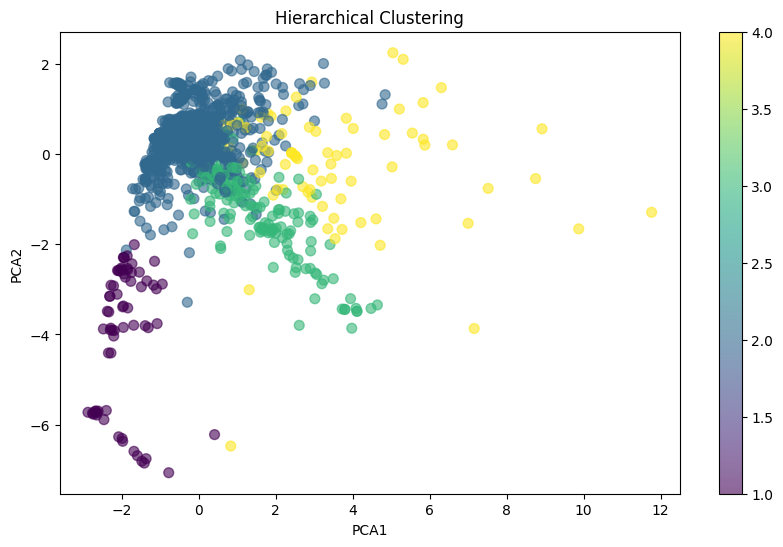

Text(0, 0.5, 'Distance')

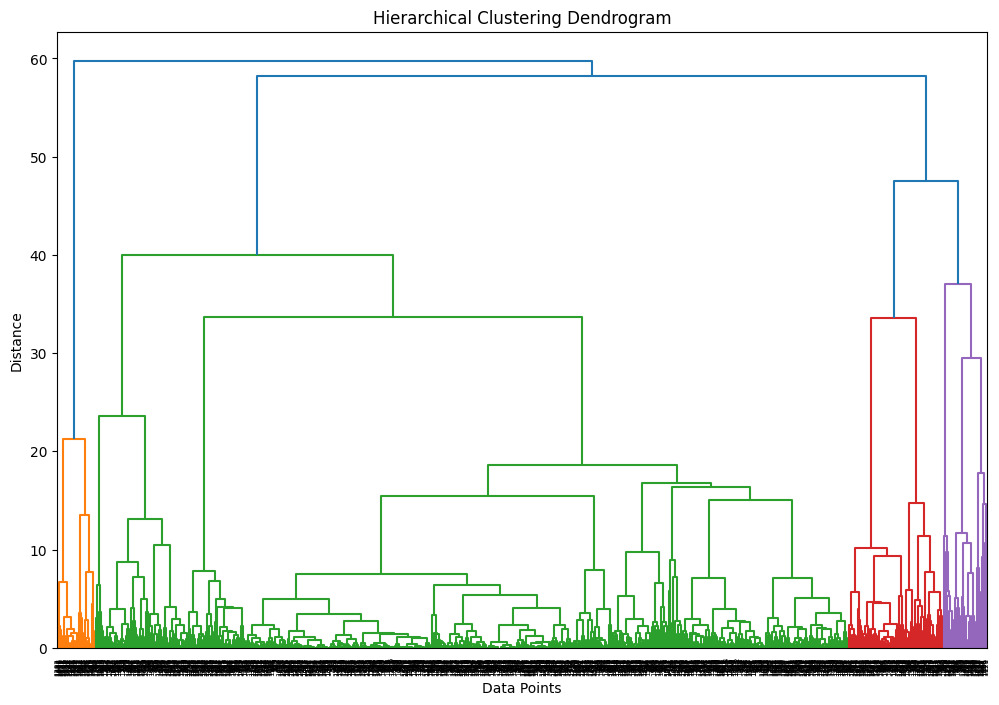

In [137]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 2: Apply PCA (explained variance ratio = 0.95)
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(scaled_data)

# Step 6: Apply Hierarchical Clustering
Z = linkage(pca_components, method='ward')  # Using 'ward' linkage method
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')  # Creating 4 clusters

df['Hierarchical_Cluster'] = hierarchical_labels

# Function to plot the clustering results
def plot_clustering_result(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.colorbar()
    plt.show()

plot_clustering_result(pca_components, df['Hierarchical_Cluster'], 'Hierarchical Clustering')

# Step 8: Plot Hierarchical Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')